In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/slot

/content/drive/MyDrive/slot


In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [23]:
slot_friends = []
for i in range(7):
   friend = cv2.cvtColor(cv2.imread("slot" + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   slot_friends.append(friend)

In [24]:
def segment_slot(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_yellow = (20, 10, 100)
    dark_yellow = (30, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_yellow, dark_yellow)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [25]:
results = [segment_slot(friend) for friend in slot_friends]

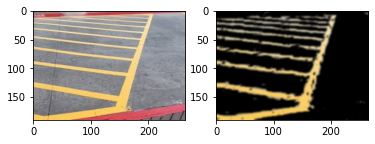

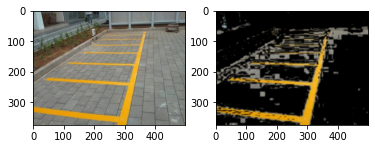

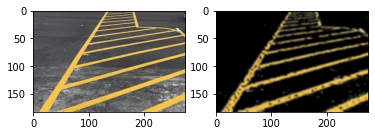

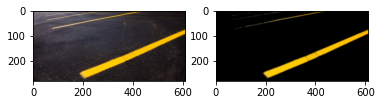

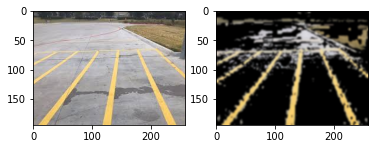

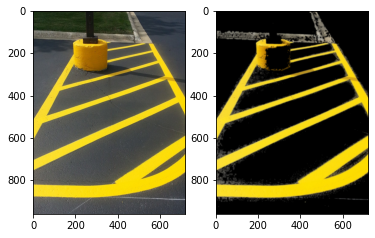

In [26]:
for i in range(1, 7):
    plt.subplot(1, 2, 1)
    plt.imshow(slot_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()